<a href="https://colab.research.google.com/github/jelaenas/APM1111/blob/main/SA_2_CESISTA_KJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving AlzheimersMiceData.csv to AlzheimersMiceData.csv


{'AlzheimersMiceData.csv': b'\xef\xbb\xbfAD_Status,Treatment,Training,Memory\r\n1,1,12,10\r\n1,1,15,12\r\n1,1,13,13\r\n1,1,12,10\r\n1,1,14,13\r\n1,2,15,13\r\n1,2,17,13\r\n1,2,16,14\r\n1,2,17,15\r\n1,2,14,11\r\n1,3,13,12\r\n1,3,14,11\r\n1,3,18,15\r\n1,3,15,10\r\n1,3,16,14\r\n1,4,14,12\r\n1,4,13,11\r\n1,4,12,10\r\n1,4,14,13\r\n1,4,15,10\r\n2,1,17,9\r\n2,1,16,8\r\n2,1,17,10\r\n2,1,14,8\r\n2,1,13,8\r\n2,2,14,7\r\n2,2,18,10\r\n2,2,16,5\r\n2,2,17,9\r\n2,2,14,7\r\n2,3,13,8\r\n2,3,14,7\r\n2,3,18,9\r\n2,3,15,8\r\n2,3,16,9\r\n2,4,14,7\r\n2,4,13,9\r\n2,4,12,5\r\n2,4,14,8\r\n2,4,15,4\r\n'}

/tmp/ipython-input-1433791605.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Treatment_Label", y=dv_column, data=df, palette="Set3")


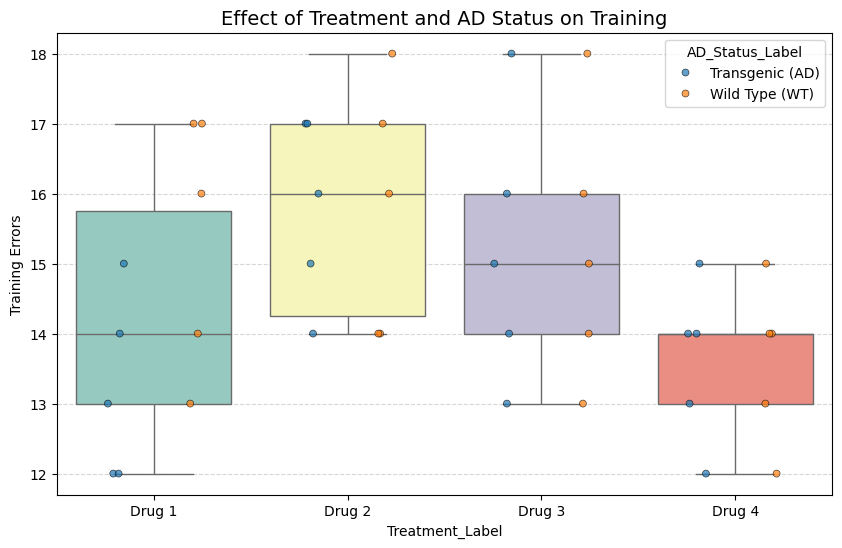

DESCRIPTIVE STATISTICS
--------------------------------------------------
      AD Status Treatment  N  Mean  Std. Dev  Skewness  SE Skew  Kurtosis  SE Kurt  Shapiro W  Shapiro p
Transgenic (AD)    Drug 1  5  13.2      1.30     0.541    0.913    -1.488      2.0      0.902      0.421
Transgenic (AD)    Drug 2  5  15.8      1.30    -0.541    0.913    -1.488      2.0      0.902      0.421
Transgenic (AD)    Drug 3  5  15.2      1.92     0.590    0.913    -0.022      2.0      0.979      0.928
Transgenic (AD)    Drug 4  5  13.6      1.14    -0.405    0.913    -0.178      2.0      0.961      0.814
 Wild Type (WT)    Drug 1  5  15.4      1.82    -0.567    0.913    -2.231      2.0      0.867      0.254
 Wild Type (WT)    Drug 2  5  15.8      1.79     0.052    0.913    -2.324      2.0      0.894      0.377
 Wild Type (WT)    Drug 3  5  15.2      1.92     0.590    0.913    -0.022      2.0      0.979      0.928
 Wild Type (WT)    Drug 4  5  13.6      1.14    -0.405    0.913    -0.178      2.0    

In [3]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene, shapiro
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Dataset

df = pd.read_csv('AlzheimersMiceData.csv')

dv_column = 'Training'

df['AD_Status_Label'] = df['AD_Status'].map({1: 'Transgenic (AD)', 2: 'Wild Type (WT)'})
df['Treatment_Label'] = df['Treatment'].map({1: 'Drug 1', 2: 'Drug 2', 3: 'Drug 3', 4: 'Drug 4'})

# Plotbox (Assumption 4)

plt.figure(figsize=(10, 6))

sns.boxplot(x="Treatment_Label", y=dv_column, data=df, palette="Set3")

sns.stripplot(
    x="Treatment_Label",
    y=dv_column,
    hue="AD_Status_Label",
    data=df,
    dodge=True,
    jitter=True,
    marker='o',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

plt.title(f'Effect of Treatment and AD Status on {dv_column}', fontsize=14)
plt.ylabel(f'{dv_column} Errors')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Descriptive Statistics (Assumption 5)

print("DESCRIPTIVE STATISTICS")
print("-" * 50)

def calc_se_skew(n): return np.sqrt((6*n*(n-1)) / ((n-2)*(n+1)*(n+3)))
def calc_se_kurt(n):
        se_skew = calc_se_skew(n)
        return np.sqrt((4*(n**2 - 1) * se_skew**2) / ((n-3)*(n+5)))

groups = df.groupby(['AD_Status_Label', 'Treatment_Label'])

table_data = []
for (ad, drug), group_df in groups:
        data = group_df[dv_column]
        n = len(data)

        w_stat, p_val = shapiro(data)

        table_data.append({
            'AD Status': ad,
            'Treatment': drug,
            'N': n,
            'Mean': round(data.mean(), 2),
            'Std. Dev': round(data.std(), 2),
            'Skewness': round(data.skew(), 3),
            'SE Skew': round(calc_se_skew(n), 3),
            'Kurtosis': round(data.kurtosis(), 3),
            'SE Kurt': round(calc_se_kurt(n), 3),
            'Shapiro W': round(w_stat, 3),
            'Shapiro p': round(p_val, 3)
        })

desc_df = pd.DataFrame(table_data)
print(desc_df.to_string(index=False))
print("-" * 50 + "\n")

# Levene's Test (Assumption 6)

print("LEVENE'S TEST")
print("-" * 50)

samples = [group[dv_column].values for name, group in groups]
stat, p_val = levene(*samples)


k = len(samples)
N = len(df)
df1 = k - 1
df2 = N - k

print("\nTest for Equality of Variances")
print("(Levene's)")
print("-" * 50)
print(f"{'F':<10} {'df1':<10} {'df2':<10} {'p':<10}")
print("-" * 50)
print(f"{stat:<10.3f} {df1:<10.0f} {df2:<10.0f} {p_val:<10.3f}")
print("-" * 50 + "\n")

#ANOVA

print("TWO-WAY ANOVA RESULTS (Training Days) - Type III Sum of Squares")
print("-" * 100)

formula = f'{dv_column} ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=3)
anova_table['eta_sq'] = anova_table['sum_sq'] / (anova_table['sum_sq'] + anova_table['sum_sq']['Residual'])
anova_table.columns = ['Sum Sq', 'df', 'F', 'p', 'Partial Eta Sq']
print(anova_table.round(3))
print("-" * 100 + "\n")

print("MAIN EFFECTS: AD STATUS DESCRIPTIVES")
print("-" * 50)

ad_status_stats = df.groupby('AD_Status_Label')[dv_column].agg(['mean', 'std', 'count'])

ad_status_stats.columns = ['Mean', 'SD', 'N']
print(ad_status_stats.round(2))
print("-" * 50 + "\n")

#Post-Hoc (Tukey HSD)
print("POST-HOC TESTS (Tukey HSD for Treatment)")
#Run on treatment since main effect was significant
print("-" * 100)

tukey = pairwise_tukeyhsd(endog=df[dv_column],
                          groups=df['Treatment_Label'],
                          alpha=0.05)

results_df = pd.DataFrame(data=tukey._results_table.data[1:],
                          columns=tukey._results_table.data[0])
results_df['meandiff'] = pd.to_numeric(results_df['meandiff'])
results_df['lower'] = pd.to_numeric(results_df['lower'])
results_df['upper'] = pd.to_numeric(results_df['upper'])
results_df['p-adj'] = pd.to_numeric(results_df['p-adj'])

results_df = results_df.rename(columns={
    'group1': 'Group 1',
    'group2': 'Group 2',
    'meandiff': 'Mean Difference',
    'p-adj': 'p-value',
    'lower': 'Lower CI',
    'upper': 'Upper CI'
})

final_table = results_df[['Group 1', 'Group 2', 'Mean Difference', 'Lower CI', 'Upper CI', 'p-value']]

final_table = final_table.round(3)

print(final_table.to_string(index=False))
print("-" * 100 + "\n")

#Descriptive Statistics
print("DESCRIPTIVE STATISTICS SUMMARY")
print("-" * 100)

desc_table = df.groupby(['AD_Status_Label', 'Treatment_Label'])[dv_column].agg(['count', 'mean', 'std', 'sem']).reset_index()
desc_table['cv'] = desc_table['std'] / desc_table['mean']
desc_table.columns = ['AD Status', 'Treatment', 'N', 'Mean', 'SD', 'SE', 'Coeffecient of Variantion']
desc_table = desc_table.round(2)

print(desc_table.to_string(index=False))
print("-" * 100 + "\n")

/tmp/ipython-input-1023422278.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Treatment_Label", y=dv_column, data=df, palette="Set3")


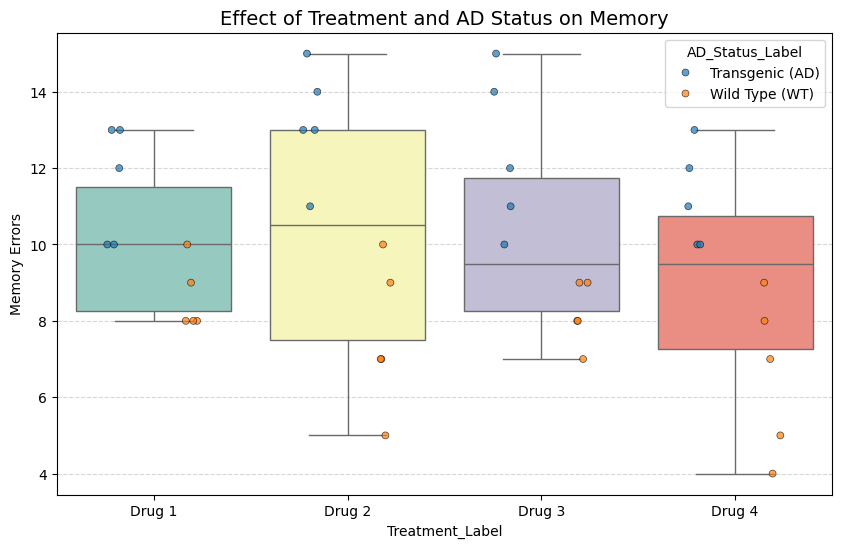

DESCRIPTIVE STATISTICS
--------------------------------------------------
      AD Status Treatment  N  Mean  Std. Dev  Skewness  SE Skew  Kurtosis  SE Kurt  Shapiro W  Shapiro p
Transgenic (AD)    Drug 1  5  11.6      1.52    -0.315    0.913    -3.081      2.0      0.803      0.086
Transgenic (AD)    Drug 2  5  13.2      1.48    -0.552    0.913     0.868      2.0      0.956      0.777
Transgenic (AD)    Drug 3  5  12.4      2.07     0.236    0.913    -1.963      2.0      0.952      0.754
Transgenic (AD)    Drug 4  5  11.2      1.30     0.541    0.913    -1.488      2.0      0.902      0.421
 Wild Type (WT)    Drug 1  5   8.6      0.89     1.258    0.913     0.313      2.0      0.771      0.046
 Wild Type (WT)    Drug 2  5   7.6      1.95    -0.081    0.913    -0.817      2.0      0.953      0.758
 Wild Type (WT)    Drug 3  5   8.2      0.84    -0.512    0.913    -0.612      2.0      0.881      0.314
 Wild Type (WT)    Drug 4  5   6.6      2.07    -0.236    0.913    -1.963      2.0    

In [5]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene, shapiro
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Dataset

df = pd.read_csv('AlzheimersMiceData.csv')

dv_column = 'Memory'

df['AD_Status_Label'] = df['AD_Status'].map({1: 'Transgenic (AD)', 2: 'Wild Type (WT)'})
df['Treatment_Label'] = df['Treatment'].map({1: 'Drug 1', 2: 'Drug 2', 3: 'Drug 3', 4: 'Drug 4'})

# Plotbox (Assumption 4)

plt.figure(figsize=(10, 6))

sns.boxplot(x="Treatment_Label", y=dv_column, data=df, palette="Set3")

sns.stripplot(
    x="Treatment_Label",
    y=dv_column,
    hue="AD_Status_Label",
    data=df,
    dodge=True,
    jitter=True,
    marker='o',
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

plt.title(f'Effect of Treatment and AD Status on {dv_column}', fontsize=14)
plt.ylabel(f'{dv_column} Errors')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Descriptive Statistics (Assumption 5)

print("DESCRIPTIVE STATISTICS")
print("-" * 50)

def calc_se_skew(n): return np.sqrt((6*n*(n-1)) / ((n-2)*(n+1)*(n+3)))
def calc_se_kurt(n):
        se_skew = calc_se_skew(n)
        return np.sqrt((4*(n**2 - 1) * se_skew**2) / ((n-3)*(n+5)))

groups = df.groupby(['AD_Status_Label', 'Treatment_Label'])

table_data = []
for (ad, drug), group_df in groups:
        data = group_df[dv_column]
        n = len(data)

        w_stat, p_val = shapiro(data)

        table_data.append({
            'AD Status': ad,
            'Treatment': drug,
            'N': n,
            'Mean': round(data.mean(), 2),
            'Std. Dev': round(data.std(), 2),
            'Skewness': round(data.skew(), 3),
            'SE Skew': round(calc_se_skew(n), 3),
            'Kurtosis': round(data.kurtosis(), 3),
            'SE Kurt': round(calc_se_kurt(n), 3),
            'Shapiro W': round(w_stat, 3),
            'Shapiro p': round(p_val, 3)
        })

desc_df = pd.DataFrame(table_data)
print(desc_df.to_string(index=False))
print("-" * 50 + "\n")

# Levene's Test (Assumption 6)

print("LEVENE'S TEST")
print("-" * 50)

samples = [group[dv_column].values for name, group in groups]
stat, p_val = levene(*samples)


k = len(samples)
N = len(df)
df1 = k - 1
df2 = N - k

print("\nTest for Equality of Variances")
print("(Levene's)")
print("-" * 50)
print(f"{'F':<10} {'df1':<10} {'df2':<10} {'p':<10}")
print("-" * 50)
print(f"{stat:<10.3f} {df1:<10.0f} {df2:<10.0f} {p_val:<10.3f}")
print("-" * 50 + "\n")

#ANOVA

print("TWO-WAY ANOVA RESULTS (Memory Days) - Type III Sum of Squares")
print("-" * 100)

formula = f'{dv_column} ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=3)
anova_table['eta_sq'] = anova_table['sum_sq'] / (anova_table['sum_sq'] + anova_table['sum_sq']['Residual'])
anova_table.columns = ['Sum Sq', 'df', 'F', 'p', 'Partial Eta Sq']
print(anova_table.round(3))
print("-" * 100 + "\n")

print("MAIN EFFECTS: AD STATUS DESCRIPTIVES")
print("-" * 50)

ad_status_stats = df.groupby('AD_Status_Label')[dv_column].agg(['mean', 'std', 'count'])

ad_status_stats.columns = ['Mean', 'SD', 'N']
print(ad_status_stats.round(2))
print("-" * 50 + "\n")

#Post-Hoc (Tukey HSD)
print("POST-HOC TESTS (Tukey HSD for Treatment)")
#Run on treatment since main effect was significant
print("-" * 100)

tukey = pairwise_tukeyhsd(endog=df[dv_column],
                          groups=df['Treatment_Label'],
                          alpha=0.05)

results_df = pd.DataFrame(data=tukey._results_table.data[1:],
                          columns=tukey._results_table.data[0])
results_df['meandiff'] = pd.to_numeric(results_df['meandiff'])
results_df['lower'] = pd.to_numeric(results_df['lower'])
results_df['upper'] = pd.to_numeric(results_df['upper'])
results_df['p-adj'] = pd.to_numeric(results_df['p-adj'])

results_df = results_df.rename(columns={
    'group1': 'Group 1',
    'group2': 'Group 2',
    'meandiff': 'Mean Difference',
    'p-adj': 'p-value',
    'lower': 'Lower CI',
    'upper': 'Upper CI'
})

final_table = results_df[['Group 1', 'Group 2', 'Mean Difference', 'Lower CI', 'Upper CI', 'p-value']]

final_table = final_table.round(3)

print(final_table.to_string(index=False))
print("-" * 100 + "\n")

#Descriptive Statistics
print("DESCRIPTIVE STATISTICS SUMMARY")
print("-" * 100)

desc_table = df.groupby(['AD_Status_Label', 'Treatment_Label'])[dv_column].agg(['count', 'mean', 'std', 'sem']).reset_index()
desc_table['cv'] = desc_table['std'] / desc_table['mean']
desc_table.columns = ['AD Status', 'Treatment', 'N', 'Mean', 'SD', 'SE', 'Coeffecient of Variantion']
desc_table = desc_table.round(2)

print(desc_table.to_string(index=False))
print("-" * 100 + "\n")